<a href="https://colab.research.google.com/github/Elbereth-Elentari/Book_recommender/blob/master/Plots.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
cat = pd.read_json('/content/drive/My Drive/Library_catalogue_preprocessed.jl', lines=True, orient='records')

In [3]:
cat.head()

,title,author,storage,WD_signature,publisher,year,pages,language,tokens,interesting
0,Pomiary fizyczne za pomocą komputera : dla stu...,"Jagiełło, Michał (1941-2016).",magazyn,QC39 .P58 1999,Wydaw. Naukowe UAM,9999,238,pl,"[pomiara, fizyczny, pomoc, komputer, student, ...",
1,Poszukiwanie prawdy : uwolnienie od iluzji,"Andrykowski, Janusz (1935- ).",magazyn,DK4133 .L47 1992 t.1,Studio,2021,406,pl,"[poszukiwanie, prawda, uwolnienie, iluzja]",
2,Wielki Pierd : opowiadania historyczne,"Bednarczyk, Ryszard (1953- ).",magazyn,,Drukpol sp.j,2020,146,pl,"[wielki, pierd, opowiadanie, historyczny]",
3,Instrumentalne wszczynanie postępowań karnych ...,"Ladziński, Andrzej.",magazyn,KKP3693 .L337 2020,TNOiK.,2020,122,pl,"[instrumentalny, wszczynanie, postępowanie, ka...",
4,Wszystko nie tak! 2,"Frączyk, Izabella (1970- ).",,PG7206.R335 W793 2020,Prószyński i S,2020,461,pl,[2],


In [4]:
cat.groupby(by='year').size().reset_index().sort_values(0, ascending=False)[:20]

,year,0
425,2013,23744
427,2015,23072
426,2014,22978
424,2012,22870
428,2016,22781
422,2010,22724
423,2011,22435
421,2009,20478
429,2017,19986
430,2018,19980


In [5]:
cat_20_21 = cat[(cat['year'] >= 1900) & (cat['year'] <= 2021)]
years = list(cat_20_21.year.unique())
years.sort()
book_counts = [len(cat[cat['year'] == year]) for year in years]

In [10]:
book_lengths = [np.mean(cat[cat['year'] == year]['pages']) for year in years]

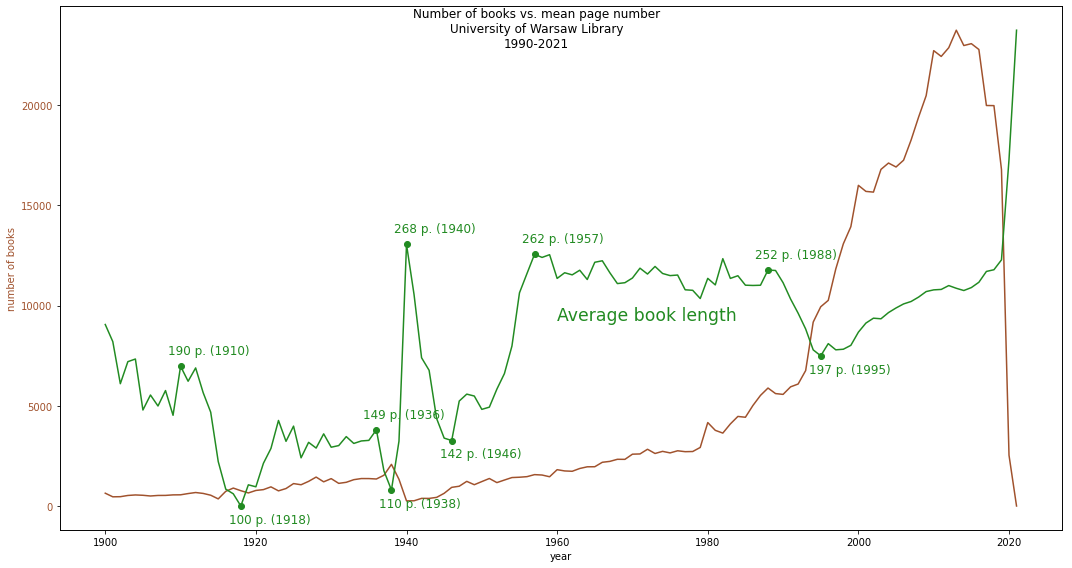

In [140]:
fig, ax1 = plt.subplots(figsize=(15,8))

color = 'sienna'
ax1.set_xlabel('year')
ax1.set_ylabel('number of books', color=color)
ax1.plot(years, book_counts, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()

color = 'forestgreen'
ax2.plot(years, book_lengths, color=color)
ax2.axes.yaxis.set_visible(False)
#ax1.axes.xaxis.set_visible(False)

ax2.scatter(years_for_max_lengths, length_maxima, color=color)
for length, year in zip(length_maxima, years_for_max_lengths):
    ax2.annotate(f'{int(length)} p. ({year})', (year,length), 
                 textcoords='offset points', xytext=(-13,12), color=color,
                 size='large')
ax2.scatter(years_for_min_lengths, length_minima, color=color)
for length, year in zip(length_minima, years_for_min_lengths):
    ax2.annotate(f'{int(length)} p. ({year})', (year,length),
                 textcoords='offset points', xytext=(-12,-17), color=color,
                 size='large')

ax2.text(1960, 220, 'Average book length', color=color, size='xx-large')

fig.suptitle('Number of books vs. mean page number\nUniversity of Warsaw Library\n1990-2021')

fig.tight_layout()
plt.show()

In [141]:
length_maxima_boundaries = [(5,15), (35,38), (39,44), (50,60), (85,90)]
length_maxima = [max(book_lengths[boundary[0]:boundary[1]]) for boundary in length_maxima_boundaries]
length_minima_boundaries = [(15,20), (37,40), (40,50), (90,100)]
length_minima = [min(book_lengths[boundary[0]:boundary[1]]) for boundary in length_minima_boundaries]

In [103]:
years_for_max_lengths = [years[book_lengths.index(length)] for length in length_maxima]
years_for_min_lengths = [years[book_lengths.index(length)] for length in length_minima]

In [142]:
count_maxima_boundaries = [(35,40), (75,85), (90,100), (105,120)]
count_minima_boundaries = [(38,42), (115,120)]